In [2]:
import SALib as sa
from SALib import ProblemSpec
from SALib.analyze import sobol
import numpy as np
import sys
sys.path.append("../scripts")
from model import DuneModel
from experiment_utils import *
sys.path.remove("../scripts")

In [19]:
def salib_wrapper(target: str, **kwargs):
    """ Wrapper for SALib to use the DuneModel, since there can be multiple outputs, this returns a new function specifying the target output """
    def out_fun(inputs):
        result = np.empty(len(inputs))
        for i, inp in enumerate(inputs):
            m = DuneModel(width=inp[0].astype(int),
                height=inp[1].astype(int),
                n_tribes=inp[2].astype(int),
                n_agents=inp[3].astype(int),
                n_heaps=inp[4].astype(int),
                vision_radius=inp[5].astype(int),
                step_count=inp[6].astype(int),
                alpha=inp[7],
                trade_percentage=inp[8],
                **kwargs)
            out = m.run_model()
            result[i] = out[target].to_numpy()[-1]
        return result

    return out_fun

In [14]:
# Define the problem specification dictionary
problem = ProblemSpec({
    'names': [
    "width",
    "height",
    "n_tribes",
    "n_agents",
    "n_heaps",
    "vision_radius",
    "step_count",
    "alpha",
    "trade_percentage",
],
    'bounds': [
    (10, 200),  # width
    (10, 200),  # height
    (1, 10),    # n_tribes
    (10, 100),  # n_agents
    (1, 10),    # n_heaps
    (1, 10),    # vision_radius
    (50, 500),   # step_count
    (0.0, 1.0), # alpha
    (0.0, 1.0), # trade_percentage
    ]
})

kwargs = {
    "experiment_name": "test",
    "spice_generator": gen_spice_map,
    "river_generator": gen_river_random,
    "location_generator": random_locations,
    "spice_kwargs": {"cov_range": (3, 9), "total_spice": 1000}
}


In [18]:
sensitivity_target_nomads = salib_wrapper('Nomads', **kwargs)
sa.ProblemSpec.evaluate_parallel
# Generate samples using Sobol sequence
samples = problem.sample_sobol(1024)

# Evaluate the model
results = samples.evaluate_parallel(sensitivity_target_nomads)


/home/amirsahrani/miniconda3/envs/compsci/lib/python3.12/site-packages/SALib/util/problem.py:213: UserWarning: Parallel evaluation is an experimental feature and may not work.
  warnings.warn(


testingtestingtesting

testing
testing

testingtesting

testingtesting
testingtesting
testing

testing
testing
testing

testingtestingtesting


testing
testingtesting
testingtesting
testingtesting
testing
testing

testingtesting
testing



testing
testing


/home/amirsahrani/Documents/python/Computational/AgentBasedModeling/ABM/notebooks/../scripts/model.py:67: UserWarning: Agent 0 is being placed with
place_agent() despite already having the position (1, 68). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(spice, (x, y))
/home/amirsahrani/Documents/python/Computational/AgentBasedModeling/ABM/notebooks/../scripts/model.py:67: UserWarning: Agent 0 is being placed with
place_agent() despite already having the position (4, 85). In most
cases, you'd want to clear the current position with remove_agent()
before placing the agent again.
  self.grid.place_agent(spice, (x, y))
/home/amirsahrani/Documents/python/Computational/AgentBasedModeling/ABM/notebooks/../scripts/model.py:67: UserWarning: Agent 1 is being placed with
place_agent() despite already having the position (4, 86). In most
cases, you'd want to clear the current position with remove_agent()
before pl

KeyboardInterrupt: 

Samples:
	9 parameters: ['width', 'height', 'n_tribes', 'n_agents', 'n_heaps', 'vision_radius', 'step_count', 'alpha', 'trade_percentage']
	160 samples
Outputs:
	1 outputs: ['Y']
	160 evaluations
Analysis:
                        ST   ST_conf
width             0.002035  0.047422
height            0.077490  0.093561
n_tribes          0.012121  0.293179
n_agents          0.068105  0.269354
n_heaps           0.008395  0.201424
vision_radius     0.003619  0.044622
step_count        1.104404  1.007190
alpha             0.001341  0.019225
trade_percentage  0.039096  0.092510
                        S1   S1_conf
width             0.004018  0.262338
height            0.065241  0.462175
n_tribes          0.014307  1.088518
n_agents          0.001865  1.041047
n_heaps          -0.048559  0.910099
vision_radius     0.029054  0.384662
step_count        0.723320  1.236273
alpha             0.013998  0.212687
trade_percentage  0.172419  0.495605
                                         S2   S2_conf


/home/amirsahrani/miniconda3/envs/compsci/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/home/amirsahrani/miniconda3/envs/compsci/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

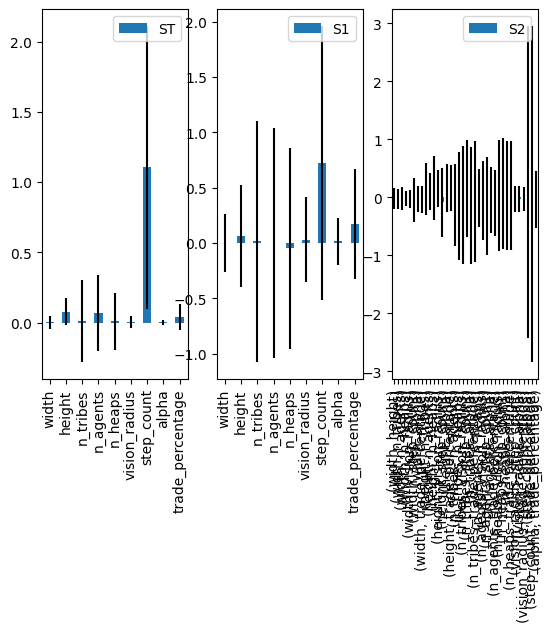

In [13]:

Si = results.analyze_sobol()
print(Si)

Si.plot()